In [79]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import pandas as pd
import math as mt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.metrics.pairwise import euclidean_distances as euc
from src import Spotify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
my_sp = Spotify()
my_sp.search()
my_sp.get_genres()
my_sp.get_features()
my_sp.get_recommend()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


# 데이터 수집

In [11]:
my_sp.reco_tracks.head()

,trackId,trackName,artistIds,artistName,image
0,7xAACq6jlGqXw4bNCTYcm6,LUCIFER,2hRQKC0gqlZGPrmUKbcchR,SHINee,https://i.scdn.co/image/ab67616d0000b27390ad9f...
1,5efB9wfc6dn3pzll9ElIrH,Lonely,5rGgflnIpRNizTCozbYBuY,JONGHYUN,https://i.scdn.co/image/ab67616d0000b273f9188f...
2,6NVc3RD71LkGVTcMbipQyd,Good Life,"02kJSzxNuaWGqwubyUba0Z,0cGUm45nv7Z6M6qdXYQGTX","G-Eazy,Kehlani",https://i.scdn.co/image/ab67616d0000b273c13155...
3,5WrmurzLklDfXdFAKjwwdF,DON'T CRY,3uHb6dRazmcaT15bMexUtt,Park Bom,https://i.scdn.co/image/ab67616d0000b2732bca17...
4,6oZee3RwM7GHykYHZeb7GT,I'm so sick,2uWcrwgWmZcQc3IPBs3tfU,Apink,https://i.scdn.co/image/ab67616d0000b2730b1f5b...


In [15]:
reco_sp = Spotify()
reco_sp.sel_tracks = my_sp.reco_tracks
reco_sp.get_genres()
reco_sp.get_features()

reco_sp.features.head()

,trackId,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7xAACq6jlGqXw4bNCTYcm6,0.750,0.914,11,-1.819,0.0518,0.03230,0.000000,0.1070,0.866,125.034
1,5efB9wfc6dn3pzll9ElIrH,0.559,0.526,3,-6.183,0.0368,0.63000,0.000000,0.1440,0.344,86.910
2,6NVc3RD71LkGVTcMbipQyd,0.572,0.778,1,-5.208,0.2330,0.00638,0.000000,0.0563,0.540,168.073
3,5WrmurzLklDfXdFAKjwwdF,0.595,0.838,2,-2.918,0.0344,0.01790,0.000043,0.3410,0.447,130.022
4,6oZee3RwM7GHykYHZeb7GT,0.594,0.810,6,-2.083,0.0531,0.12800,0.000000,0.0324,0.777,123.752


# 데이터 전처리

## 데이터 병합 및 수치 데이터 파싱

In [293]:
# 1. 데이터 병합
my_features = my_sp.features
reco_features = reco_sp.features
merge_features = pd.concat([my_features, reco_features], ignore_index=True)
feature_cols = merge_features.columns[1:]

#2. 수치 데이터 파싱
_merge_features = merge_features.iloc[:, 1:].values
_merge_features[:5]

array([[ 5.39000e-01,  2.37000e-01,  0.00000e+00, -8.45200e+00,
         2.73000e-02,  8.20000e-01,  0.00000e+00,  3.45000e-01,
         2.59000e-01,  6.80450e+01],
       [ 3.59000e-01,  4.69000e-01,  7.00000e+00, -8.06000e+00,
         3.26000e-02,  7.45000e-01,  0.00000e+00,  1.01000e-01,
         2.59000e-01,  8.43660e+01],
       [ 7.50000e-01,  9.14000e-01,  1.10000e+01, -1.81900e+00,
         5.18000e-02,  3.23000e-02,  0.00000e+00,  1.07000e-01,
         8.66000e-01,  1.25034e+02],
       [ 5.59000e-01,  5.26000e-01,  3.00000e+00, -6.18300e+00,
         3.68000e-02,  6.30000e-01,  0.00000e+00,  1.44000e-01,
         3.44000e-01,  8.69100e+01],
       [ 5.72000e-01,  7.78000e-01,  1.00000e+00, -5.20800e+00,
         2.33000e-01,  6.38000e-03,  0.00000e+00,  5.63000e-02,
         5.40000e-01,  1.68073e+02]])

## 정규화
- min-max normalization

In [266]:
_norm_features = (_merge_features - _merge_features.min(axis=0)) / \
                (_merge_features.max(axis=0) - _merge_features.min(axis=0))
norm_features = pd.DataFrame(_norm_features, columns=feature_cols)
norm_features['trackId'] = merge_features['trackId']

norm_features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,trackId
0,0.447094,0.163472,0.000000,0.507341,0.006216,0.835015,0.000000,0.363380,0.212059,0.021310,2y4hHM6c48Qzk0bqh33XfB
1,0.178838,0.433020,0.636364,0.535415,0.021192,0.758632,0.000000,0.088451,0.212059,0.138928,1OQ3PoRZRtE7RH0NIh3p1O
2,0.761550,0.950041,1.000000,0.982382,0.075445,0.032798,0.000000,0.095211,0.905219,0.432003,7xAACq6jlGqXw4bNCTYcm6
3,0.476900,0.499245,0.272727,0.669842,0.033060,0.641513,0.000000,0.136901,0.309124,0.157261,5efB9wfc6dn3pzll9ElIrH
4,0.496274,0.792030,0.090909,0.739669,0.587454,0.006400,0.000000,0.038085,0.532945,0.742165,6NVc3RD71LkGVTcMbipQyd
...,...,...,...,...,...,...,...,...,...,...,...
182,0.682563,0.326130,0.272727,0.557258,0.041255,0.566149,0.000000,0.087211,0.299989,0.530876,0xCA70t1ZA4fa9UOE0lIJm
183,0.266766,0.017079,0.090909,0.049273,0.038994,0.970466,0.003589,0.085296,0.176659,0.125538,4Q66chx9WzqWcLItXoZ5r4
184,0.244411,0.184385,0.636364,0.208050,0.066686,1.000000,0.979014,0.083155,0.030490,0.081110,0bpuJswbM5oyHa9jwEEaJk
185,0.795827,0.800163,0.818182,0.797536,0.071489,0.005351,0.000848,0.392676,0.441590,0.467783,6FtACIYlhIFPFH6KCleHVq


# 클러스터 개수 선정

In [138]:
K = round(
    mt.sqrt(len(norm_features) / 2)
)

print(K) # 10

10


# KMeans++ Init Centroids

In [139]:
def init_centroids(data, K):
    centroids = np.append([], data[np.random.randint(data.shape[0]), :])
    centroids = np.expand_dims(centroids, axis=0)
    
    for c_id in range(K - 1):
        dist = euc(data, centroids).min(axis=1)
        next_centroid = data[np.argmax(dist), :]

        centroids = np.append(centroids,[next_centroid], axis=0)
        
    return centroids

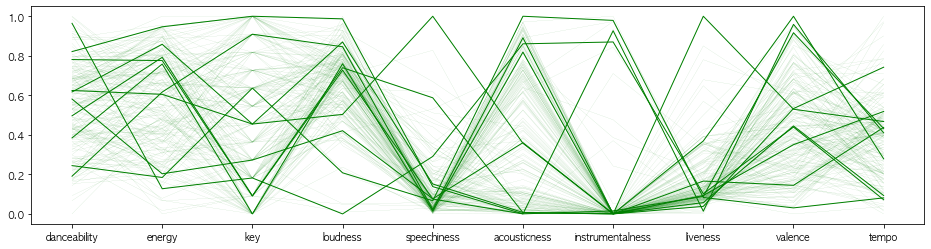

In [140]:
clusters_ = init_centroids(norm_features, K)

plt.figure(figsize=(16,4))

plt.plot(feature_cols,norm_features.T,label='데이터',color='g',linewidth=0.05)
plt.plot(feature_cols,clusters_.T,label='초기 중심값',color='g',linewidth=1)

plt.show()

# Cluster Label 부여

In [141]:
labels_ = euc(clusters_, norm_features).argmin(axis=0)

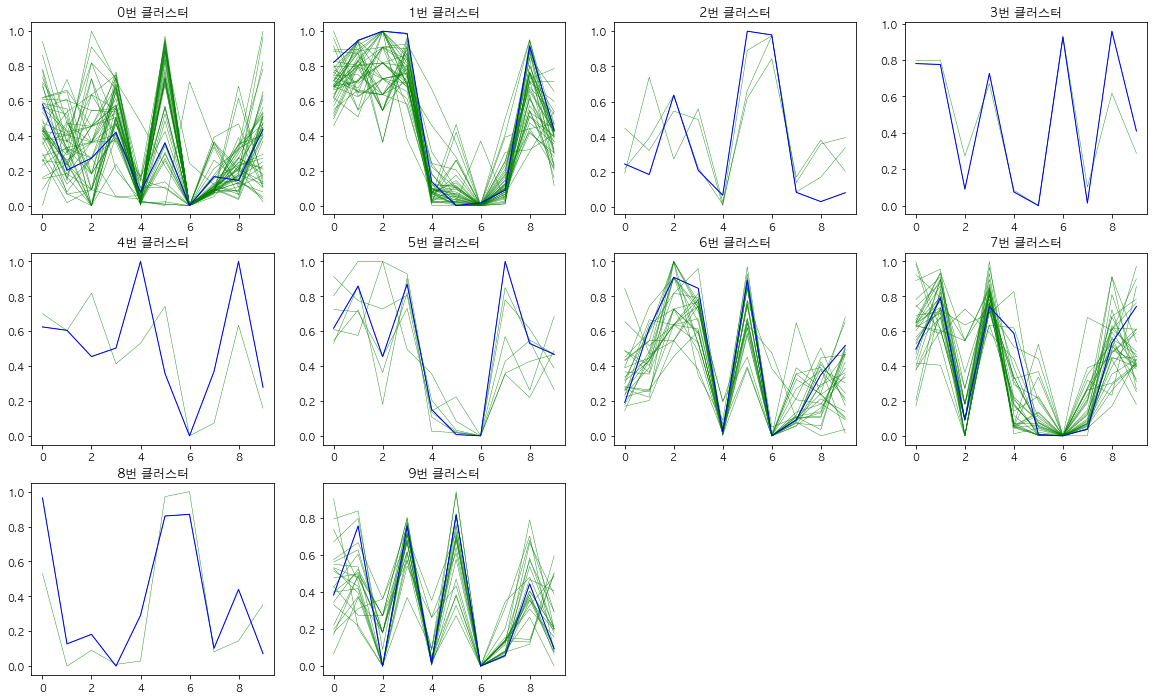

In [142]:
COL_SIZE = 4

r = mt.floor((K - 1) / COL_SIZE) + 1
plt.figure(figsize=(20, COL_SIZE*r))

for ax_idx in range(r * COL_SIZE):
    ax = plt.subplot(r, COL_SIZE, ax_idx + 1)

    if ax_idx >= K:
        ax.set_visible(False)
    else:
        _cluster = clusters_[ax_idx]
        _datas = norm_features[labels_ == ax_idx]

        ax.plot(_datas.T, c='g', linewidth=0.4)
        ax.plot(_cluster, c='b', linewidth=1)
        ax.set_title("{}번 클러스터".format(ax_idx))

# 중심값 이동

In [145]:
for label in np.unique(labels_):
    clusters_[label] = norm_features[labels_ == label].mean(axis=0)

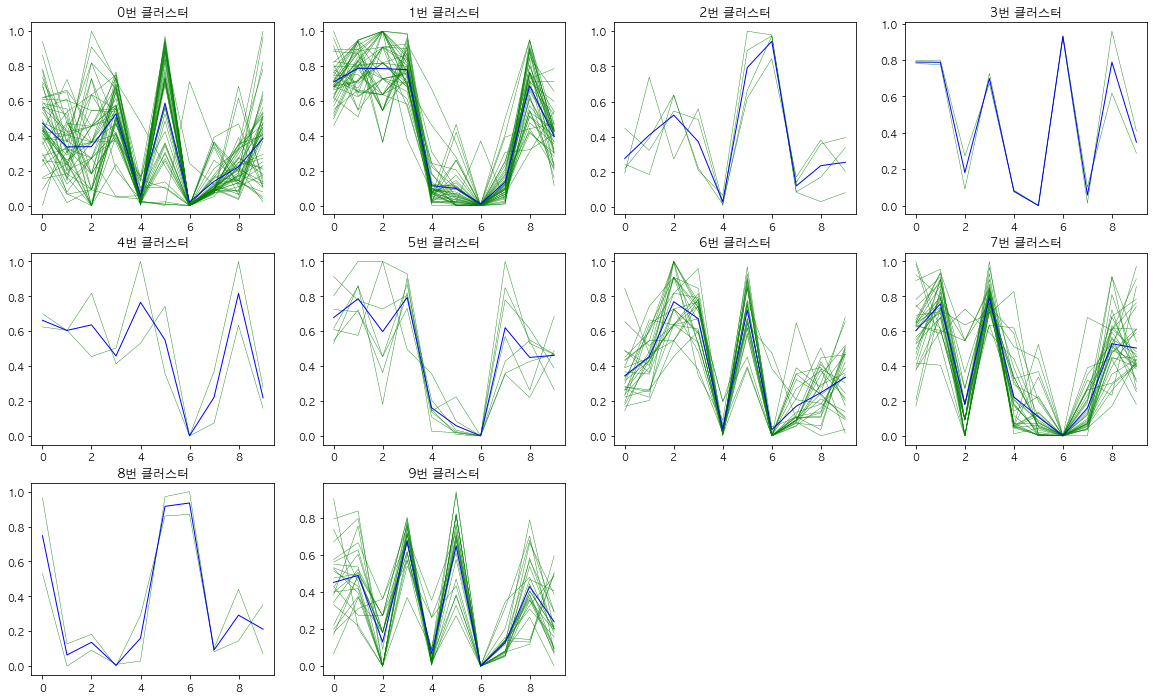

In [182]:
COL_SIZE = 4

r = mt.floor((K - 1) / COL_SIZE) + 1
plt.figure(figsize=(20, COL_SIZE*r))

for ax_idx in range(r * COL_SIZE):
    ax = plt.subplot(r, COL_SIZE, ax_idx + 1)

    if ax_idx >= K:
        ax.set_visible(False)
    else:
        _cluster = clusters_[ax_idx]
        _datas = norm_features[labels_ == ax_idx]

        ax.plot(_datas.T, c='g', linewidth=0.4)
        ax.plot(_cluster, c='b', linewidth=1)
        ax.set_title("{}번 클러스터".format(ax_idx))

# 정지 조건 및 품질 평가

In [187]:
def move_centroids():
    for label in np.unique(labels_):
        clusters_[label] = norm_features[labels_ == label].mean(axis=0)

In [188]:
def next_round():
    labels_ = euc(clusters_, norm_features).argmin(axis=0)

In [189]:
mean_features = norm_features.mean(axis=0)
tss = (euc(np.expand_dims(mean_features, axis=0), norm_features) ** 2).sum()

In [190]:
wss = np.array([(euc(
    np.expand_dims(clusters_[label], axis=0)
    ,norm_features[labels_ == label]) ** 2).sum() 
        for label in range(K)]).sum()

In [194]:
ecv = 1 - (wss / tss)
ecv

0.5692649388929771

In [195]:
# 0.5692649388929771
next_round()

In [196]:
move_centroids()

# 음악 필터링 결과

ECV 57%
ECV 59%
ECV 61%
ECV 61%
ECV 62%
ECV 62%
ECV 62%
ECV 62%
ECV 62%


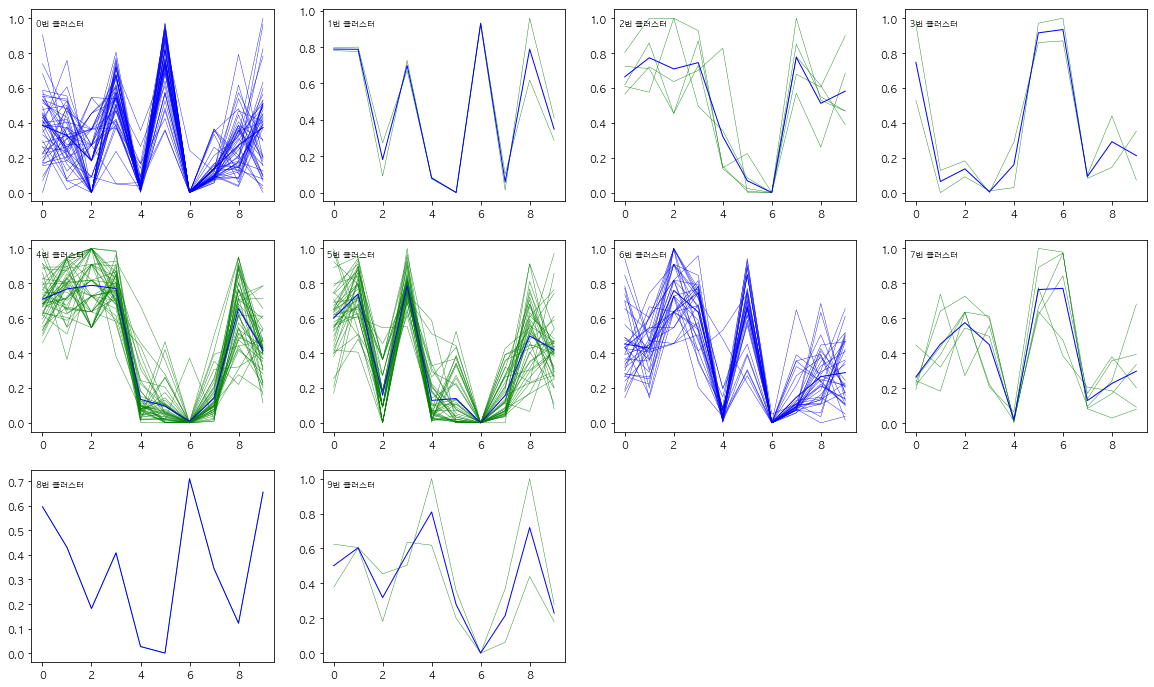

In [267]:
from src import KMeans

kmeans = KMeans(_norm_features, feature_cols)
kmeans.fit()

# 내 라벨 파싱
labels = kmeans.labels_
cluster_info = merge_features.copy()
cluster_info['label'] = labels

my_info = pd.merge(left=my_features,right=cluster_info,on="trackId")
my_info = my_info[['trackId', 'label']]

my_labels = my_info['label'].values
my_labels

kmeans.cluster_plot(my_labels)

# 음악 필터링 결과

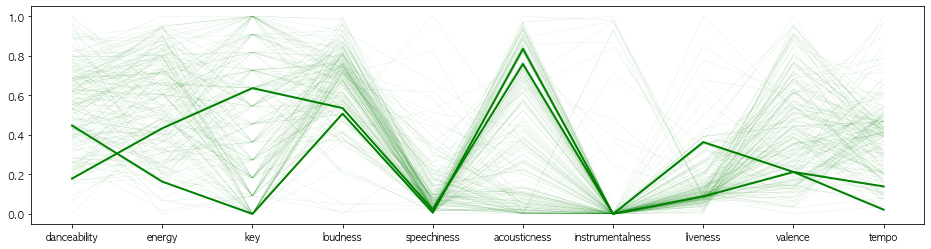

In [269]:
plt.figure(figsize=(16,4))

plt.plot(feature_cols, _norm_features[2:].T, color='g', linewidth=0.05)
plt.plot(feature_cols, _norm_features[:2].T, color='g', linewidth=2.0)

plt.show()

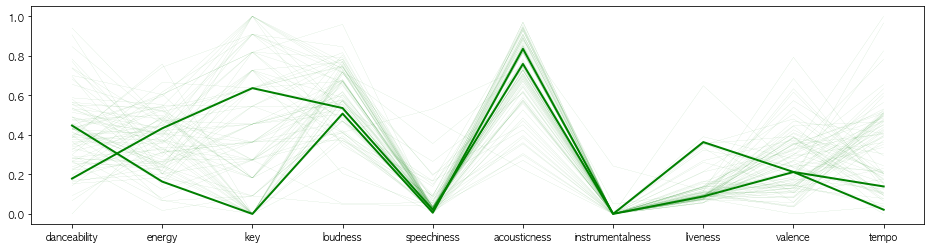

In [288]:
reco_info = pd.merge(left=cluster_info, right=my_info, on='label')
reco_info = pd.DataFrame(reco_info['trackId_x'])
reco_info.columns = ['trackId']

plt.figure(figsize=(16,4))
plt.plot(feature_cols,norm_features.set_index("trackId").loc[reco_info['trackId']].values.T, color='g', linewidth=0.05)
plt.plot(feature_cols,norm_features.set_index("trackId").loc[my_info['trackId']].values.T, color='g', linewidth=2.0)

plt.show()

# 필터링 전 거리

In [301]:
_my_features = norm_features.set_index("trackId").loc[my_info['trackId']].reset_index()
_reco_features = norm_features.set_index("trackId").loc[reco_features['trackId']].reset_index()

euc(_my_features.iloc[:,1:].values,_reco_features.iloc[:, 1:].values).mean()

1.0432870011584772

# 필터링 후 거리

In [302]:
_my_features = norm_features.set_index("trackId").loc[my_info['trackId']].reset_index()
_reco_features = norm_features.set_index("trackId").loc[reco_info['trackId']].reset_index()

euc(_my_features.iloc[:,1:].values,_reco_features.iloc[:, 1:].values).mean()

0.7428376314953247